In [2]:
import os as os
import numpy as np
import matplotlib.pyplot as P
from importlib import reload
import h5py
import FuncMC2d as F
import pprint

/home/vipin/ElasticString/MC2d/FuncMC2d.py:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


In [5]:
from scipy.spatial import SphericalVoronoi, geometric_slerp
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [19]:
def plot_qhull(sv):
    t_vals = np.linspace(0, 1, 2000)
    fig = P.figure()
    ax = fig.add_subplot(111, projection='3d')
    # plot the unit sphere for reference (optional)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='y', alpha=0.05)
    # plot generator points
    ax.scatter(sv.points[2:, 0], sv.points[2:, 1], sv.points[2:, 2], c='r')
    # plot Voronoi vertices
    #ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], c='g')
    #ax.axhline(0.5, ls=':')
    ax.scatter(points[0:2, 0], points[0:2, 1], points[0:2, 2], c='k')
    ax.scatter(sv.points[:, 0],sv.points[:, 1], points[:, 2], c='g')
    for region in sv.simplices:
        n = len(region)
        for i in range(n):
            start = sv.points[region][i]
            end = sv.points[region][(i + 1) % n]
            # print(i)
            # print(start)
            # print(end)
            result = geometric_slerp(start, end, t_vals)
            ax.plot(result[..., 0],
                    result[..., 1],
                    result[..., 2],
                    c='k')
    ax.azim = 10
    ax.elev = 40
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_zticks([])
    #fig.set_size_inches(4, 4)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    P.show()

In [6]:
P.rc('font',size=22)
P.rc('figure',figsize=(8,6))
P.rc('figure.constrained_layout',use=True)
P.rc('xtick',direction='in')
P.rc('ytick',direction='in')
P.rc('xtick.major',size=8,width=2)
P.rc('xtick.minor',visible=True,size=4,width=1)
P.rc('ytick.major',size=8,width=2)
P.rc('ytick.minor',visible=True,size=4,width=1)

[0. 0.]
Eini/N= 0.4384857880750102
MC steps 1000
accepted moves 603
Efin/N= 0.0013994021800885484
Run over, go home


<IPython.core.display.Javascript object>


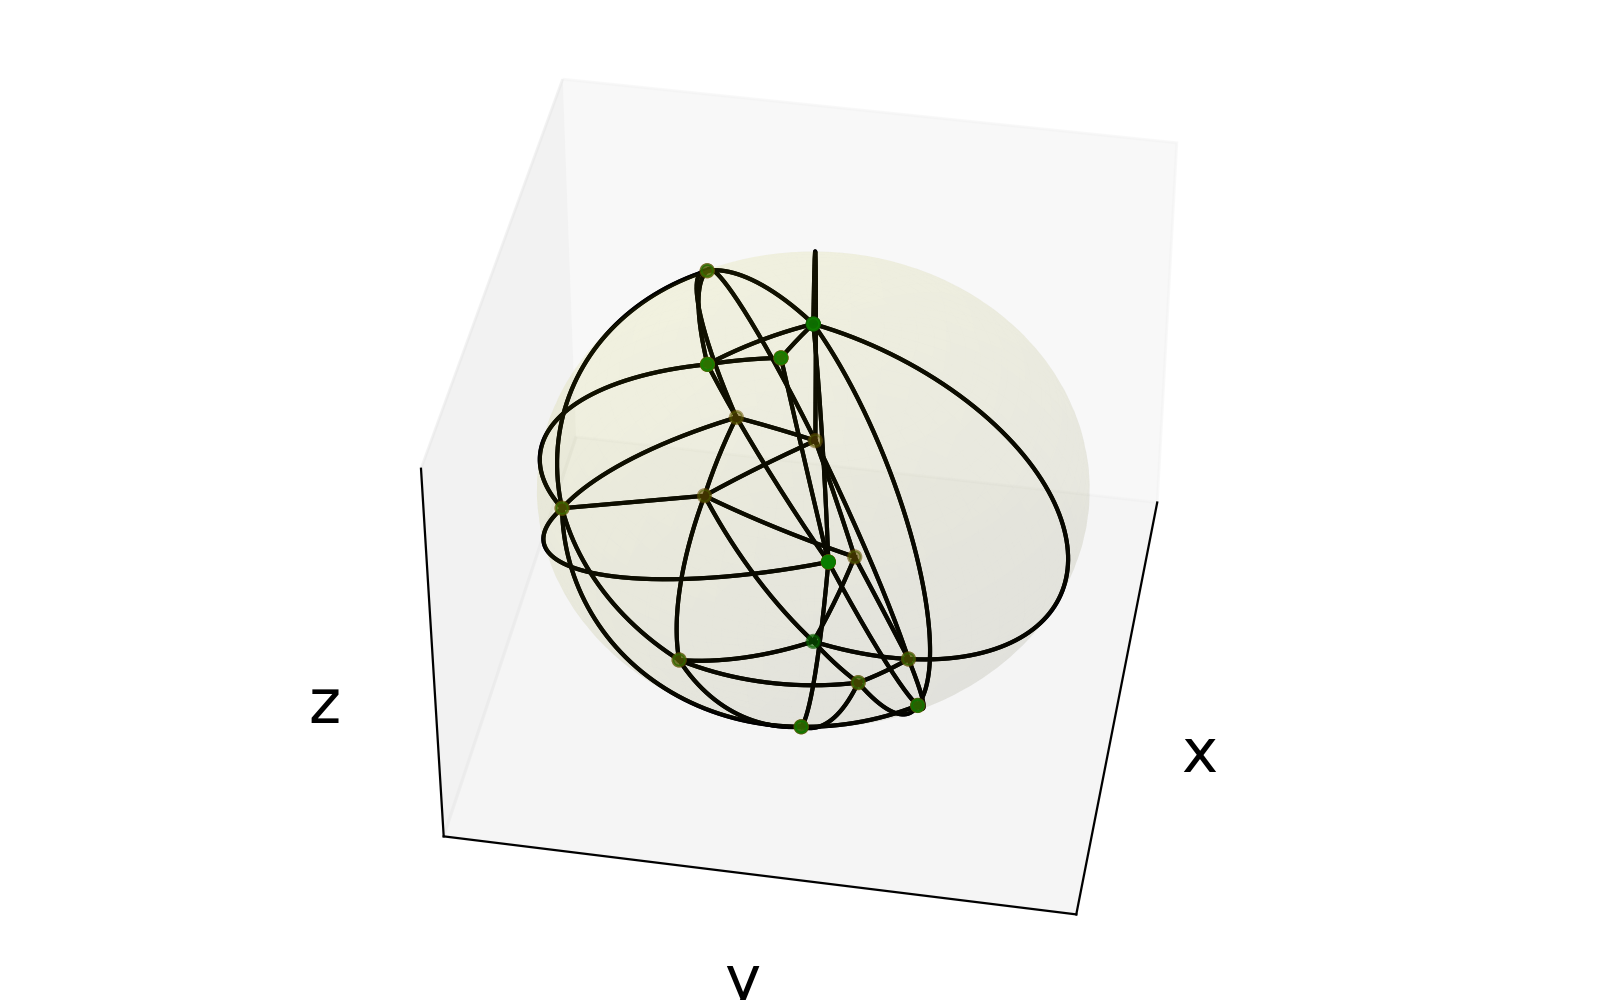

In [29]:
%matplotlib notebook
Np=16
rrini = F.rand_sph(Np)
rr = F.MC_surf(Np,Lone=np.pi,Ltwo=2*np.pi,metric='sph',maxiter=1000,kBT=1.,
                     dfac=Np,interactive=False)
sv = F.SphVoronoi(rr,lplot=True)
points=sv.points
hull = ConvexHull(points)

In [30]:
hull.neighbors

array([[ 3, 12,  4],
       [17,  8,  5],
       [ 7, 16, 21],
       [ 0, 24, 18],
       [ 0,  5,  6],
       [ 1,  4,  8],
       [10,  7,  4],
       [ 2,  8,  6],
       [ 1,  7,  5],
       [15, 20, 25],
       [ 6, 11, 12],
       [22, 10, 13],
       [ 0, 13, 10],
       [26, 12, 11],
       [19, 15, 16],
       [ 9, 14, 18],
       [ 2, 17, 14],
       [ 1, 16, 18],
       [ 3, 17, 15],
       [14, 20, 21],
       [ 9, 19, 23],
       [ 2, 22, 19],
       [11, 21, 23],
       [27, 22, 20],
       [ 3, 26, 25],
       [ 9, 24, 27],
       [13, 24, 27],
       [23, 26, 25]], dtype=int32)

In [31]:
hull.simplices

array([[11,  0,  5],
       [12,  0, 14],
       [13,  7, 14],
       [ 3,  0,  5],
       [ 4, 11,  0],
       [ 4, 12,  0],
       [ 4, 11,  7],
       [ 4,  7, 14],
       [ 4, 12, 14],
       [ 1,  3,  8],
       [10, 11,  7],
       [10, 15,  7],
       [10, 11,  5],
       [10, 15,  5],
       [ 6, 13,  8],
       [ 6,  3,  8],
       [ 6, 13, 14],
       [ 6,  0, 14],
       [ 6,  3,  0],
       [ 2, 13,  8],
       [ 2,  1,  8],
       [ 2, 13,  7],
       [ 2, 15,  7],
       [ 2,  1, 15],
       [ 9,  3,  5],
       [ 9,  1,  3],
       [ 9, 15,  5],
       [ 9,  1, 15]], dtype=int32)

In [16]:
sv.points

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.22464680e-16,  0.00000000e+00, -1.00000000e+00],
       [ 1.49883766e-01,  3.63344054e-02, -9.88035762e-01],
       [-7.37706996e-01, -2.34069674e-01, -6.33245431e-01],
       [-8.00324978e-02,  1.62513717e-01,  9.83455180e-01],
       [-8.24851679e-01,  5.58395344e-01,  8.83988005e-02],
       [-3.38601392e-01,  9.08904998e-01, -2.43394336e-01],
       [-6.93589813e-01,  6.15758555e-01, -3.73864377e-01],
       [ 7.17634905e-01,  4.70554314e-01,  5.13399241e-01],
       [-1.83931914e-01,  3.65112862e-01, -9.12612541e-01],
       [-3.39544023e-01,  4.86339751e-01, -8.05098443e-01],
       [-3.05932304e-01,  8.47894185e-01,  4.32990619e-01],
       [-3.71877693e-01,  7.22477170e-02,  9.25465963e-01],
       [ 7.62183357e-01, -1.91357836e-01,  6.18432461e-01],
       [-1.99194309e-01, -9.47601360e-02,  9.75367697e-01],
       [-1.90400831e-01,  4.34161875e-01,  8.80483384e-01]])

In [14]:
dir(hull)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_update',
 '_vertices',
 'add_points',
 'area',
 'close',
 'coplanar',
 'equations',
 'good',
 'max_bound',
 'min_bound',
 'ndim',
 'neighbors',
 'npoints',
 'nsimplex',
 'points',
 'simplices',
 'vertices',
 'volume']

In [46]:
hf=h5py.File("fin_pos.h5","r")
rr=np.array(hf.get('rr'))
hf.close()

In [54]:
print(F.normal(sv,130))
print(sv.points[130])

[ 676  677  678  679 3092 3096 3098]
[ 0.2476978   0.51352543 -0.82154576]
[ 0.20113317  0.63535779 -0.74556417]


In [58]:
print(np.linalg.norm(sv.points[34]))
print(np.linalg.norm(F.normal(sv,34)))

1.0
[ 896  897  925  926 1726 1728]
1.0


In [16]:
sv.points[2]

array([-0.59454901,  0.77539353, -0.2127824 ])

In [18]:
sv.trinrml

array([[ 0.05316685, -0.90871431, -0.41401884],
       [-0.85261315,  0.49981398, -0.15243621],
       [ 0.74687066, -0.0889042 , -0.65899944],
       ...,
       [ 0.04224838, -0.14890741,  0.98794821],
       [-0.04214715, -0.13531963,  0.98990516],
       [ 0.03000382,  0.18485801, -0.98230712]])

<IPython.core.display.Javascript object>


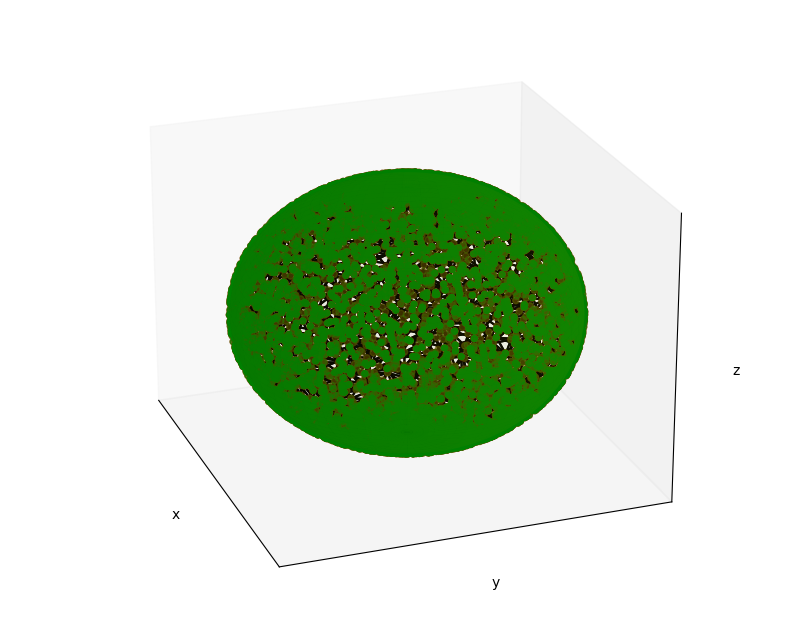

In [59]:
Np=8192
rrini = F.rand_sph(Np)
sv = F.SphVoronoi(rrini)
F.assign_newmems(sv)

In [104]:
err=0
for ip in range(Np):
    err_ip=np.linalg.norm(sv.points[ip]-sv.trinrml[F.get_tri(sv,ip)[0]])
    if err_ip>1:
        err_ip=np.linalg.norm(sv.points[ip]+sv.trinrml[F.get_tri(sv,ip)[0]])
    err=err+err_ip
err/Np

0.028809497080991273

In [114]:
err=0
for ip in range(Np):
    err=err+np.linalg.norm(sv.regions[ip]-sv.tris[sv.cntris[ip]:sv.cntris[ip+1]])
err

0.0

In [176]:
sv.points

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.22464680e-16,  0.00000000e+00, -1.00000000e+00],
       [-3.11442539e-01,  6.80431685e-01,  6.63337219e-01],
       ...,
       [-6.11140047e-01, -7.81329212e-01, -1.26619530e-01],
       [-2.84059181e-02, -6.00141531e-01, -7.99389296e-01],
       [-7.27617785e-02,  3.75907310e-01, -9.23796199e-01]])

In [3]:
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
